
<center>
  <h1 style='background:#ff3300; border:4; border-radius: 10px; color:black; font-size: 36px'>Supermarket store branches sales analysis</h1>
  <p style='background:#ff3300; border:4; border-radius: 10px; color:black; font-size: 15px; text-align: center;'>www.kaggle.com</p>
</center>




## Content:
In the dataset, You'll get data of different stores of a supermarket company as per their store IDs which for ease has been converted to positive integers.

#### Store ID: (Index) ID of the particular store.

#### Store_Area: Physical Area of the store in yard square.

#### Items_Available: Number of different items available in the corresponding store.

#### Daily_Customer_Count: Number of customers who visited to stores on an average over month.

#### Store_Sales: Sales in (US $) that stores made.


<h1 style='background:#ff471a; border:3; border-radius: 10px; color:black'><center>Open file and import libraries</center></h1>


In [306]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [307]:
stores = pd.read_csv("Stores.csv", index_col='Store ID ')

In [308]:
#adjust the look of notebook
from IPython.display import HTML
css = """
<style>
div#notebook-container {
  padding: 10px;
  background-color: #fff9e6;
}

div.cell.code_cell {
  background-color: #ffffff;
  border: 3px solid #ffd966;
  padding: 10px;
}

</style>
"""
HTML(css)

<h1 style='background:#ff471a; border:3; border-radius: 10px; color:black'><center>Basic information about the dataset / Examine the data</center></h1>



In [309]:
stores.shape

(896, 4)

In [310]:
stores.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store ID,,,,
1,1659,1961,530,66490
2,1461,1752,210,39820
3,1340,1609,720,54010
4,1451,1748,620,53730
5,1770,2111,450,46620


In [311]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 1 to 896
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 35.0 KB


In [312]:
stores.columns

Index(['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales'], dtype='object')

In [313]:
stores.describe().T

,count,mean,std,min,25%,50%,75%,max
Store_Area,896.0,1485.409598,250.237011,775.0,1316.75,1477.0,1653.50,2229.0
Items_Available,896.0,1782.035714,299.872053,932.0,1575.50,1773.5,1982.75,2667.0
Daily_Customer_Count,896.0,786.350446,265.389281,10.0,600.00,780.0,970.00,1560.0
Store_Sales,896.0,59351.305804,17190.741895,14920.0,46530.00,58605.0,71872.50,116320.0


In [314]:
stores.isnull().sum()

Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [315]:
stores.isna().sum()

Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

<h1 style='background:#ff471a; border:3; border-radius: 10px; color:black'><center>Distribution and Data Visualization</center></h1>



array([[<AxesSubplot:title={'center':'Store_Area'}>,
        <AxesSubplot:title={'center':'Items_Available'}>],
       [<AxesSubplot:title={'center':'Daily_Customer_Count'}>,
        <AxesSubplot:title={'center':'Store_Sales'}>]], dtype=object)

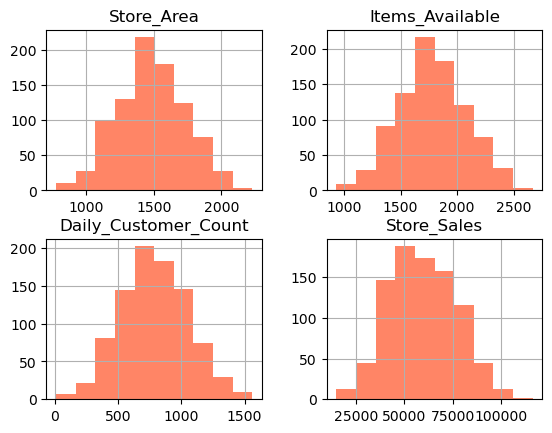

In [316]:
stores.hist(color='#ff8566')


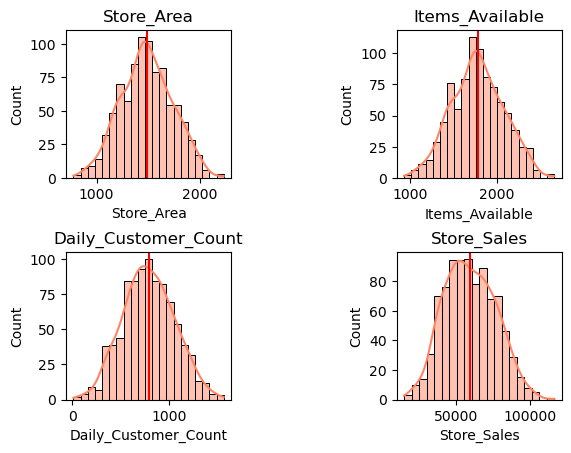

In [317]:
fig, ax = plt.subplots(2, 2)

for i, col in enumerate(stores.columns):
    sns.histplot(data=stores, x=col, ax=ax[i // 2][i % 2], kde=True,color='#ff8566')
    mean = stores[col].mean()
    ax[i // 2][i % 2].axvline(mean, color='r', label="mean") # show mean on plot as red verical line
    ax[i // 2][i % 2].set_title(col)
       
# set width and height between subplots (1 cal x axis,i 0,5 y axis)
plt.subplots_adjust(wspace=1, hspace=0.5)

In [340]:
sns.color_palette(palette=None)

[(0.33355526, 0.64107876, 0.80445484),
 (0.28708711, 0.32912157, 0.69034504),
 (0.15652427, 0.15348248, 0.22238175),
 (0.22994394, 0.13076731, 0.15146314),
 (0.61319563, 0.1824336, 0.2687872),
 (0.91463791, 0.43668557, 0.21367954)]

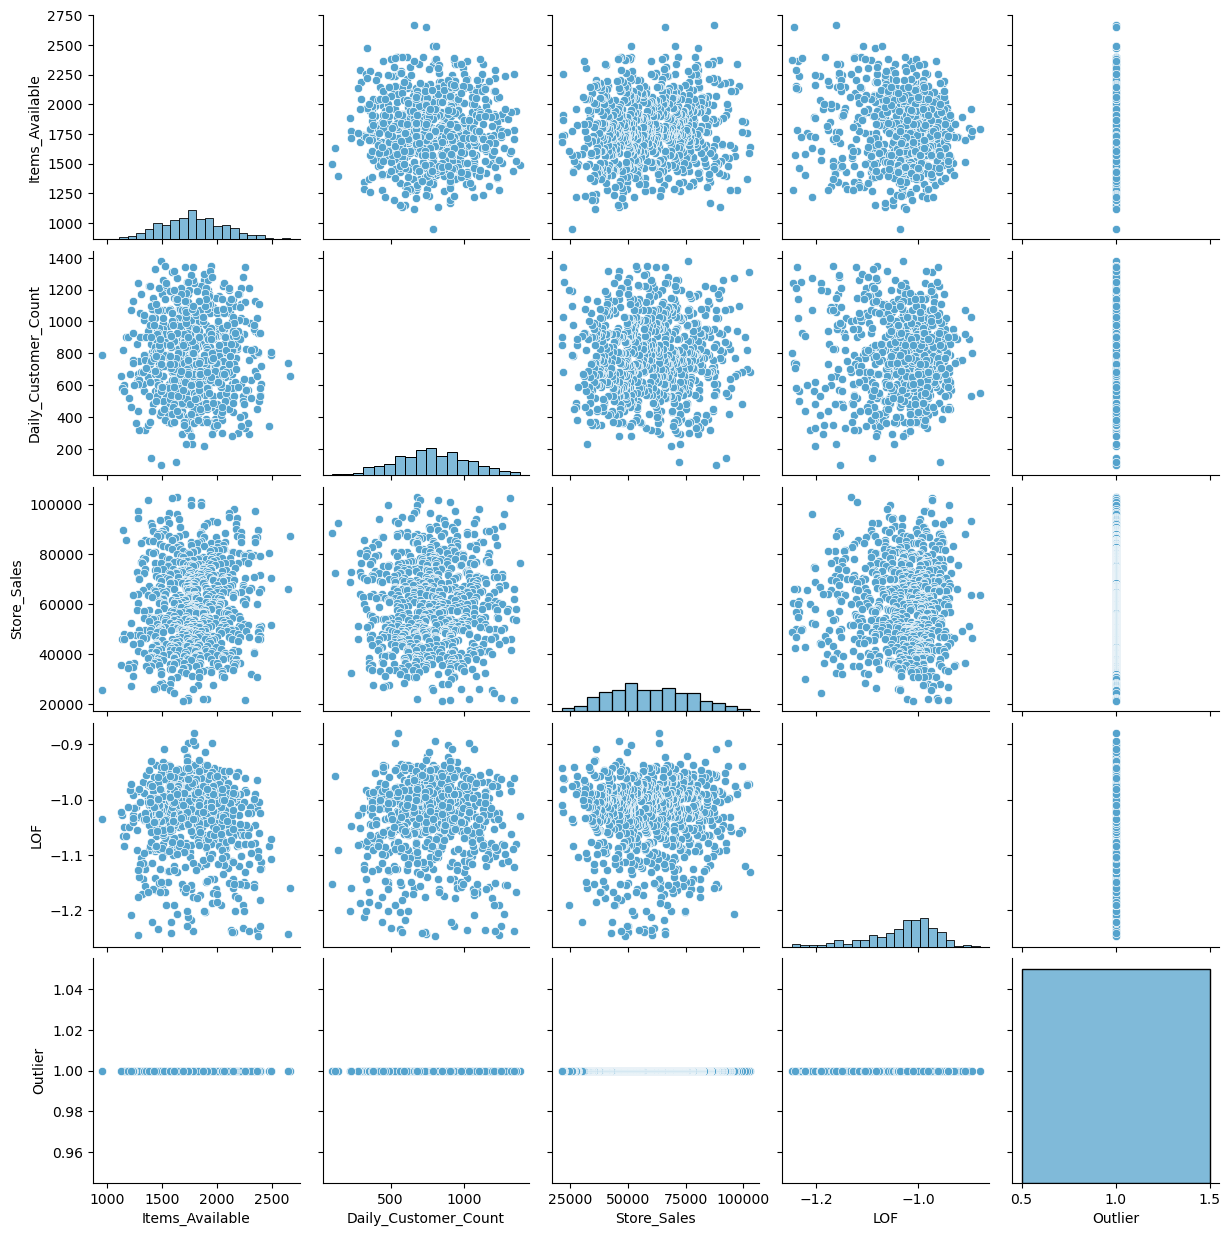

In [343]:
sns.pairplot(data=stores)
plt.show()

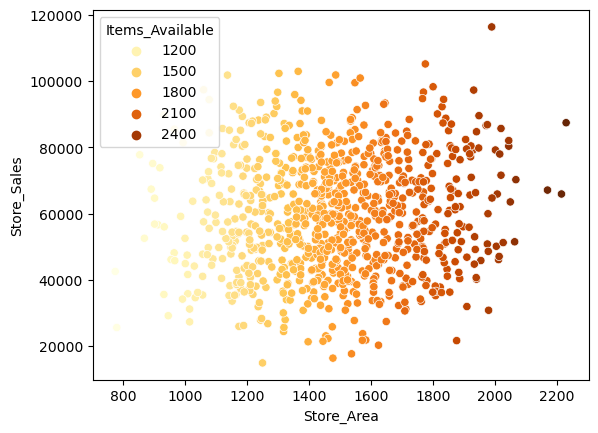

In [319]:
sns.scatterplot(x=stores.Store_Area, y = stores.Store_Sales, hue=stores.Items_Available, legend='auto',palette="YlOrBr" )
plt.show()

In [320]:
 #create ranking columns
stores['Sales_Rank']= stores['Store_Sales'].rank(ascending=False)
stores['Store_Area_Rank']= stores['Store_Area'].rank(ascending=False) 
stores['Items_Available_Rank']= stores['Items_Available'].rank(ascending=False)
stores['Daily_Customer_Count_Rank']= stores['Daily_Customer_Count'].rank(ascending=False)

stores.sort_values(by='Sales_Rank', inplace=True)

In [321]:
stores.nlargest(n=5, columns='Daily_Customer_Count')

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Sales_Rank,Store_Area_Rank,Items_Available_Rank,Daily_Customer_Count_Rank
Store ID,,,,,,,,
849,919,1099,1560,73810,197.0,887.0,888.0,1.0
350,1886,2228,1530,40350,767.0,52.0,72.0,2.0
536,1057,1262,1490,35420,834.0,862.5,864.0,3.0
95,1921,2305,1470,77120,150.5,40.0,39.0,4.0
313,1494,1806,1450,43640,718.0,426.0,405.0,5.0


In [322]:
stores.nsmallest(n=5, columns='Items_Available')

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Sales_Rank,Store_Area_Rank,Items_Available_Rank,Daily_Customer_Count_Rank
Store ID,,,,,,,,
159,775,932,1090,42530,738.0,896.0,896.0,116.5
866,780,951,790,25600,883.0,895.0,895.0,433.5
745,854,1018,660,77740,144.0,894.0,894.0,612.0
550,869,1050,850,52540,553.0,893.0,893.0,360.0
407,896,1059,870,75110,182.0,891.0,892.0,334.5


In [323]:
px.scatter(stores, x = stores.index, y=stores['Store_Sales'], template='plotly_white', color='Store_Sales', size='Store_Area', hover_data=stores.columns, width=1000, height=800)

In [324]:
stores=stores.drop(['Sales_Rank', 'Store_Area_Rank','Items_Available_Rank', 'Daily_Customer_Count_Rank', ], axis=1)

In [325]:
stores.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store ID,,,,
650,1989,2414,860,116320
869,1775,2104,980,105150
433,1365,1638,680,102920
409,1303,1587,1310,102310
759,1486,1758,820,101820


### Correlation

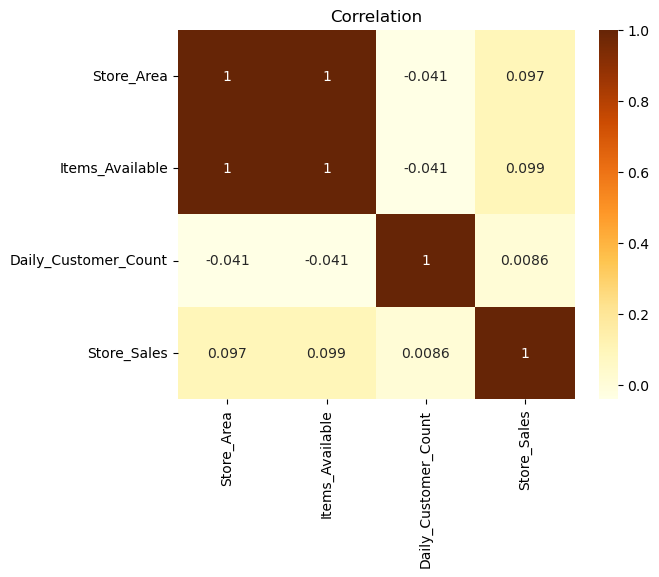

In [326]:
sns.heatmap(stores.iloc[:,:4].corr(),annot=True,cmap="YlOrBr" )
plt.title('Correlation')
plt.show()

In [327]:
stores= stores.drop('Store_Area',axis=1) # delete Store_Area. Store_Area and Items_Available are completely correlated so I deleted Store_Area

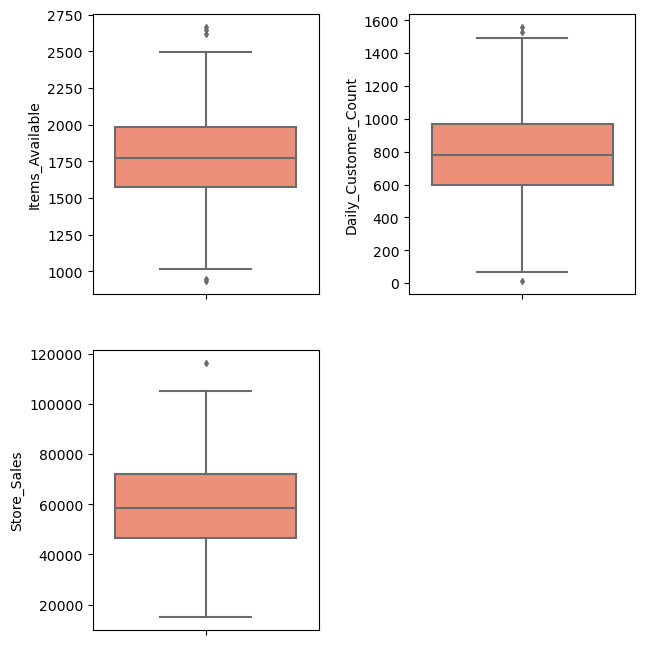

In [328]:
i=1
plt.figure(figsize=(7,8))
for feature in stores.columns:
    plt.subplot(2,2,i) #wiersze,kolumny,numer wykresu(nadaje pozycje,czwarty argument to projection do generowania typu wykresu
    sns.boxplot(y=stores[feature],color='#ff8566', fliersize=3)
    i+=1
plt.subplots_adjust(wspace=0.4, hspace=0.2)

### Outliers:

In [329]:
from sklearn.neighbors import LocalOutlierFactor
features=stores[['Items_Available','Daily_Customer_Count','Store_Sales']]
clf = LocalOutlierFactor(n_neighbors=5, contamination=0.1)
clf.fit(features)

# Calculate LOF and predict outliers
stores['LOF'] = clf.negative_outlier_factor_
stores['Outlier'] = clf.fit_predict(features)

# Find and delete outliers
stores = stores[stores['Outlier'] != -1]
stores.head()



,Items_Available,Daily_Customer_Count,Store_Sales,LOF,Outlier
Store ID,,,,,
433,1638,680,102920,-1.131888,1
409,1587,1310,102310,-0.972357,1
759,1758,820,101820,-0.972357,1
558,1374,700,101780,-0.973443,1
867,1854,900,100900,-1.119512,1


In [330]:
stores.drop(['LOF','Outlier'],axis=1)

,Items_Available,Daily_Customer_Count,Store_Sales
Store ID,,,
433,1638,680,102920
409,1587,1310,102310
759,1758,820,101820
558,1374,700,101780
867,1854,900,100900
...,...,...,...
253,1907,680,21830
278,1869,1030,21750
373,2254,1340,21650


<h1 style='background:#ff471a; border:3; border-radius: 10px; color:black'><center>Mini-Machine learning</center></h1>


In [331]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

In [332]:
y = stores.Store_Sales
stores_features = ['Items_Available','Daily_Customer_Count']
X = stores[stores_features]

In [333]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0, test_size=0.2)

In [334]:

models= [LinearRegression(), DecisionTreeRegressor(),
         RandomForestRegressor(), ElasticNet(), xgb.XGBRegressor()]
for model in models:
    model.fit(train_X, train_y)
    y_pred = model.predict(test_X)
    print(f"{model}:")
    print(f"MAE:{round(mean_absolute_error(test_y,y_pred),3)}")
    print(f"RMSE:{round(mean_squared_error(test_y,y_pred),3)}")
    print(f"R2_Score:{round(r2_score(test_y, y_pred),3)}")
    print(25*"-")

LinearRegression():
MAE:14390.173
RMSE:307604325.264
R2_Score:-0.025
-------------------------
DecisionTreeRegressor():
MAE:18674.074
RMSE:553320074.074
R2_Score:-0.843
-------------------------
RandomForestRegressor():
MAE:15076.462
RMSE:349144920.556
R2_Score:-0.163
-------------------------
ElasticNet():
MAE:14390.172
RMSE:307604232.82
R2_Score:-0.025
-------------------------
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verb

C:\Users\avoCADo_1\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



Negative r2 score means that my predictions are less accurate then the average value of the data set. 
In this case, machine learning isn't useful.

In [335]:
for i in range(10):
    print(f"{i} actual:{test_y.iloc[i]}, predicted: {round(y_pred[i],) }")

0 actual:97360, predicted: 49817
1 actual:68590, predicted: 60225
2 actual:74160, predicted: 60151
3 actual:64690, predicted: 57159
4 actual:66000, predicted: 49592
5 actual:69050, predicted: 70962
6 actual:46230, predicted: 67695
7 actual:63540, predicted: 56226
8 actual:32260, predicted: 50065
9 actual:64120, predicted: 41278


<h1 style='background:#ff471a; border:3; border-radius: 10px; color:black'><center>Conclusion and ideas</center></h1>

  <p style='background:#ff3300; border:4; border-radius: 10px; color:black; font-size: 15px; text-align: center;'>More data would allow for a much more effective analysis</p>

  <p style='background:#ff3300; border:4; border-radius: 10px; color:black; font-size: 15px; text-align: center;'>Possibly, more data would allow to build an effective machine learning model</p>

  <p style='background:#ff3300; border:4; border-radius: 10px; color:black; font-size: 15px; text-align: center;'>Surprisingly, there was no correlation found between the number of customers and sales. Nevertheless, by gathering information about customers' purchasing preferences, it may be feasible to customize offerings and increase sales.
An analysis of whether a given store requires attracting new customers or adjusting the offer to regular customers in order to increase sales could be helpful.</p>

  <p style='background:#ff3300; border:4; border-radius: 10px; color:black; font-size: 15px; text-align: center;'>Interestingly, no connection was discovered between the size of a store or the quantity of products available and its sales. However, by obtaining information about the costs, revenues, income incurred by stores, it may be possible to determine the most advantageous combination of features (such as items available and store area) that generate the highest revenue while minimizing costs</p>

  <p style='background:#ffd966; border:4; border-radius: 40px; color:black; font-size: 15px; text-align: center;'>THE END </p>